In [1]:
using Random
Random.seed!(13)

using CSV, Plots,DataFrames,LinearAlgebra, LowRankModels, Statistics, SparseArrays
pyplot()
include("proxgrad.jl")
using GLM

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling LowRankModels [15d4e49f-4837-5ea3-a885-5b28bfa376dc]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


In [2]:
train = CSV.read("train_data.csv")
test = CSV.read("test_data.csv")

# let's list all available categories, as well as their datatype using the "eltype" function.
feature_names = names(train)
for i in 1:19
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(train[!, i])))
end

1	Column1			Int64
2	CSI300			Float64
3	cproducts_ch			Float64
4	healthcare_ch			Float64
5	SP500			Float64
6	DJI_Retail			Float64
7	DJI_Pharma			Float64
8	lNew_cases_CH			Float64
9	lNew_deaths_CH			Float64
10	lNew_cases_US			Float64
11	lNew_deaths_US			Float64
12	lCOMEX_Gold			Float64
13	lUS_Tbill_10yr			Float64
14	lCSI300			Float64
15	lcproducts_ch			Float64
16	lhealthcare_ch			Float64
17	lSP500			Float64
18	lDJI_Retail			Float64
19	lDJI_Pharma			Float64


In [3]:
function MSE(y, pred)
    error=y-pred
    mse=0
    for i=1:length(error)
        mse=mse+error[i]^2
    end    
    println("MSE: ",mse/length(error))
end

MSE (generic function with 1 method)

In [4]:
function MAE(y, pred)
    error=y-pred
    mae=0
    for i=1:length(error)
        mae=mae+abs(error[i])
    end    
    println("MAE: ",mae/length(error)) 
end

MAE (generic function with 1 method)

In [5]:
function R2(y, pred)
    numerator=0
    denominator=0
    for i=1:length(y)
        numerator = numerator + (y[i] - pred[i])^2
        denominator = denominator + (y[i] - mean(y))^2
    end
    r2_score = 1 - (numerator / denominator)
    println("R^2: ",r2_score)
end

R2 (generic function with 1 method)

# Naive Linear Regression

### CSI300

In [221]:
linearRegressor = lm(@formula(CSI300 ~ lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US +
       lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + 
        lDJI_Pharma), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CSI300 ~ 1 + lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US + lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + lDJI_Pharma

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.898837     0.333922     2.69    0.0078   0.239696     1.55798
lNew_cases_CH    0.00493633   0.00170912   2.89    0.0044   0.00156265   0.00831001
lNew_deaths_CH  -0.000458457  0.00275529  -0.17    0.8680  -0.00589722   0.0049803
lNew_cases_US    0.00197529   0.00162736   1.21    0.2265  -0.00123701   0.0051876
lNew_deaths_US  -0.0016243    0.00246219  -0.66    0.5103 

### cproducts_ch

In [222]:
linearRegressor = lm(@formula(cproducts_ch ~ lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US +
       lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + 
        lDJI_Pharma), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

cproducts_ch ~ 1 + lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US + lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + lDJI_Pharma

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)      1.11778      0.380166     2.94    0.0037   0.367361     1.86821
lNew_cases_CH    0.00509135   0.00194581   2.62    0.0097   0.00125046   0.00893224
lNew_deaths_CH  -0.000926885  0.00313686  -0.30    0.7680  -0.00711884   0.00526507
lNew_cases_US    0.00200756   0.00185273   1.08    0.2801  -0.0016496    0.00566473
lNew_deaths_US  -0.000871971  0.00280317  -0.31

### healthcare_ch

In [223]:
linearRegressor = lm(@formula(healthcare_ch ~ lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US +
       lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + 
        lDJI_Pharma), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

healthcare_ch ~ 1 + lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US + lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + lDJI_Pharma

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.944588     0.398546     2.37    0.0189   0.157885     1.73129
lNew_cases_CH    0.00596082   0.00203988   2.92    0.0039   0.00193423   0.00998741
lNew_deaths_CH  -0.00497405   0.00328852  -1.51    0.1322  -0.0114654    0.00151727
lNew_cases_US    0.00240058   0.0019423    1.24    0.2182  -0.0014334    0.00623456
lNew_deaths_US  -0.000334884  0.0029387   -0.11  

### SP500

In [224]:
linearRegressor = lm(@formula(SP500 ~ lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US +
       lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + 
        lDJI_Pharma), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

SP500 ~ 1 + lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US + lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + lDJI_Pharma

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)      1.17355      0.537765     2.18    0.0305   0.112038      2.23506
lNew_cases_CH    0.00486975   0.00275245   1.77    0.0786  -0.000563391   0.0103029
lNew_deaths_CH  -0.00884      0.00443726  -1.99    0.0479  -0.0175989    -8.11528e-5
lNew_cases_US   -0.00779634   0.00262079  -2.97    0.0034  -0.0129696    -0.00262308
lNew_deaths_US   0.0085251    0.00396524   2.15    

### DJI_Retail

In [225]:
linearRegressor = lm(@formula(DJI_Retail ~ lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US +
       lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + 
        lDJI_Pharma), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

DJI_Retail ~ 1 + lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US + lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + lDJI_Pharma

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.513736    0.485562     1.06    0.2915  -0.444732     1.4722
lNew_cases_CH    0.00444932  0.00248526   1.79    0.0752  -0.000456408  0.00935505
lNew_deaths_CH  -0.00738011  0.00400652  -1.84    0.0672  -0.0152887    0.000528492
lNew_cases_US   -0.00410385  0.00236638  -1.73    0.0847  -0.00877493   0.000567217
lNew_deaths_US   0.00553195  0.00358032   1.55    0.124

### DJI_Pharma

In [226]:
linearRegressor = lm(@formula(DJI_Pharma ~ lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US +
       lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + 
        lDJI_Pharma), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

DJI_Pharma ~ 1 + lNew_cases_CH + lNew_deaths_CH + lNew_cases_US + lNew_deaths_US + lCOMEX_Gold + lUS_Tbill_10yr + lCSI300 + lcproducts_ch + lhealthcare_ch + lSP500 + lDJI_Retail + lDJI_Pharma

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      1.27528     0.426521     2.99    0.0032   0.433358     2.11721
lNew_cases_CH    0.00315907  0.00218306   1.45    0.1497  -0.00115015   0.0074683
lNew_deaths_CH  -0.00601118  0.00351935  -1.71    0.0894  -0.0129581    0.000935779
lNew_cases_US   -0.00735864  0.00207864  -3.54    0.0005  -0.0114617   -0.00325555
lNew_deaths_US   0.00902154  0.00314497   2.87    0.0046

Other method

In [10]:
y = convert(Matrix,train[:,2:7])
x = convert(Matrix,train[:, 8:19]) 
Xoffset = [x ones(length(y[:,1]))];
n=length(y[:,1])

184

In [17]:
y_test = convert(Matrix,test[:,2:7])
x_test = convert(Matrix,test[:, 8:19]) 
X_test = [x_test ones(length(y_test[:,1]))];

In [11]:
for i in 1:6
    d = zip(push!(names(train)[8:19], "intercept"), Xoffset \ y[:,i])
    println(feature_names[i+1])
    for (n,v) in d
        println("$n: $v")
    end
end

CSI300
lNew_cases_CH: 0.00493633184282528
lNew_deaths_CH: -0.00045845746340704554
lNew_cases_US: 0.001975292035001388
lNew_deaths_US: -0.001624295536875379
lCOMEX_Gold: 0.006366723053999121
lUS_Tbill_10yr: -0.02555230818437543
lCSI300: 0.9605182695349588
lcproducts_ch: -0.060922386658931175
lhealthcare_ch: -0.10033943112446732
lSP500: -0.0184601301881535
lDJI_Retail: 0.19957578054827285
lDJI_Pharma: -0.0630470773331369
intercept: 0.8988365456244732
cproducts_ch
lNew_cases_CH: 0.005091351775637317
lNew_deaths_CH: -0.0009268851463237767
lNew_cases_US: 0.0020075638935008614
lNew_deaths_US: -0.0008719712480633782
lCOMEX_Gold: 0.03914436404435177
lUS_Tbill_10yr: -0.030724094092620557
lCSI300: 0.14830237543576816
lcproducts_ch: 0.7341210908732063
lhealthcare_ch: -0.10560579865050679
lSP500: -0.13423878435370806
lDJI_Retail: 0.3677910473822696
lDJI_Pharma: -0.10370774989844173
intercept: 1.117783673604384
healthcare_ch
lNew_cases_CH: 0.005960820170450361
lNew_deaths_CH: -0.004974048963389459


# Linear Regression

### Quadratic loss + Regularization l1

In [14]:
w = proxgrad(1/n*QuadLoss(), OneReg(), Xoffset, y[:,6], maxiters=1000)
pred=Xoffset*w
MSE(y[:,6], pred)
MAE(y[:,6], pred)
R2(y[:,6], pred)

MSE: 0.007650068886608143
MAE: 0.06992341555107107
R^2: -1.0670355949223436


In [214]:
norm(Xoffset*w-y[:,6]) / norm(y[:,6])

0.01297576228724476

train data

In [12]:
for i=1:6
    w = proxgrad(1/n*QuadLoss(), OneReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=Xoffset*w
    MSE(y[:,i], pred)
    MAE(y[:,i], pred)
    R2(y[:,i], pred)
end

CSI300
MSE: 0.005667526243034605
MAE: 0.06542354217946376
R^2: 0.3919798068403286
cproducts_ch
MSE: 0.004179232541542969
MAE: 0.058982864818302935
R^2: 0.8575080059112373
healthcare_ch
MSE: 0.004631914883201847
MAE: 0.060482665804487905
R^2: 0.7870074545848057
SP500
MSE: 0.008344851467279452
MAE: 0.06547733314954242
R^2: 0.14823019443573393
DJI_Retail
MSE: 0.00620750251877586
MAE: 0.07015449880685415
R^2: 0.7097543521209764
DJI_Pharma
MSE: 0.007650068886608143
MAE: 0.06992341555107107
R^2: -1.0670355949223436


test data

In [18]:
for i=1:6
    w = proxgrad(1/n*QuadLoss(), OneReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=X_test*w
    MSE(y_test[:,i], pred)
    MAE(y_test[:,i], pred)
    R2(y_test[:,i], pred)
end

CSI300
MSE: 0.006582649504367546
MAE: 0.07957962568008664
R^2: -41.45604941138694
cproducts_ch
MSE: 0.007436762097439379
MAE: 0.08544296886559366
R^2: -23.916915959341438
healthcare_ch
MSE: 0.002301121952339202
MAE: 0.044154806181955435
R^2: -3.9006641908532664
SP500
MSE: 0.0069209723368631034
MAE: 0.08183668185620233
R^2: -28.256755151186805
DJI_Retail
MSE: 0.0058238115797679645
MAE: 0.07468425686224671
R^2: -41.33393731033429
DJI_Pharma
MSE: 0.00025985858204634457
MAE: 0.014151029843138613
R^2: 0.24224609467603708


### Quadratic Loss + Regularization l2

In [187]:
### train
for i=1:6
    w = proxgrad(1/n*QuadLoss(), QuadReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=Xoffset*w
    MSE(y[:,i], pred)
    MAE(y[:,i], pred)
    R2(y[:,i], pred)
end

CSI300
MSE: 0.0068421488960382975
MAE: 0.053204358545851045
R^2: 0.2659646351864212
cproducts_ch
MSE: 0.00935891366638902
MAE: 0.06554823286690946
R^2: 0.6809054634858889
healthcare_ch
MSE: 0.007562720506639701
MAE: 0.0567373750705872
R^2: 0.6522381927149323
SP500
MSE: 0.007197382397849989
MAE: 0.06253055870778575
R^2: 0.26535384966091
DJI_Retail
MSE: 0.006361825095284962
MAE: 0.061600857475284564
R^2: 0.702538655298339
DJI_Pharma
MSE: 0.006310153344743638
MAE: 0.06473200953953587
R^2: -0.7049926956653159


In [19]:
### test
for i=1:6
    w = proxgrad(1/n*QuadLoss(), QuadReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=X_test*w
    MSE(y_test[:,i], pred)
    MAE(y_test[:,i], pred)
    R2(y_test[:,i], pred)
end

CSI300
MSE: 0.0014522541414534538
MAE: 0.030550967702374282
R^2: -8.366589174545926
cproducts_ch
MSE: 0.0021418142646555186
MAE: 0.03807052042827408
R^2: -6.176161524827541
healthcare_ch
MSE: 0.027324856155454127
MAE: 0.1577910055878011
R^2: -57.19332780043428
SP500
MSE: 0.0006746402120832916
MAE: 0.020779353900865317
R^2: -1.8518801317751907
DJI_Retail
MSE: 0.0016406149658663922
MAE: 0.032277791662596596
R^2: -10.925813561116497
DJI_Pharma
MSE: 0.0063416010352370196
MAE: 0.07741394394281531
R^2: -17.492261878040733


### Quadratic Loss + No Regularization 

In [13]:
### train
for i=1:6
    w = proxgrad(1/n*QuadLoss(), ZeroReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=Xoffset*w
    MSE(y[:,i], pred)
    MAE(y[:,i], pred)
    R2(y[:,i], pred)
end

CSI300
MSE: 0.0011569649535950002
MAE: 0.024419827400948738
R^2: 0.8758791711942485
cproducts_ch
MSE: 0.0019103217555515987
MAE: 0.03340718035112316
R^2: 0.9348670949525113
healthcare_ch
MSE: 0.0015335517907313883
MAE: 0.02753374594510531
R^2: 0.9294816274326443
SP500
MSE: 0.001981914487315868
MAE: 0.033007778963467634
R^2: 0.7977034193927484
DJI_Retail
MSE: 0.0026843879141122224
MAE: 0.038865976020081676
R^2: 0.8744854461301499
DJI_Pharma
MSE: 0.002285220514352608
MAE: 0.04209858280729578
R^2: 0.3825373058166105


In [20]:
### test
for i=1:6
    w = proxgrad(1/n*QuadLoss(), ZeroReg(), Xoffset, y[:,i], maxiters=1000)
    println(feature_names[i+1])
    pred=X_test*w
    MSE(y_test[:,i], pred)
    MAE(y_test[:,i], pred)
    R2(y_test[:,i], pred)
end

CSI300
MSE: 0.0008022951845129411
MAE: 0.025021394031977295
R^2: -4.1745553175205705
cproducts_ch
MSE: 0.0005894642232284546
MAE: 0.021583936280108126
R^2: -0.9750034112667287
healthcare_ch
MSE: 0.012876957631532291
MAE: 0.11035110664109907
R^2: -26.423859516804416
SP500
MSE: 0.002494453858641507
MAE: 0.04821217212297012
R^2: -9.544707047808453
DJI_Retail
MSE: 0.00039707062706034263
MAE: 0.01749864816455741
R^2: -1.8863507693388337
DJI_Pharma
MSE: 0.0012266968508388982
MAE: 0.032249764564791804
R^2: -2.5770776629805665


# Quantile Regression

### CSI300

In [24]:
###train
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,1],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    test_pred=X_test*w
    println("quantile=", i)
    MSE(y[:,1], pred)
    MAE(y[:,1], pred)
    R2(y[:,1], pred)
    MSE(y_test[:,1], test_pred)
    MAE(y_test[:,1], test_pred)
    R2(y_test[:,1], test_pred)
end

quantile=0.05
MSE: 0.2705463147242684
MAE: 0.33726269183110813
R^2: -28.024589474015162
MSE: 0.004259385146297676
MAE: 0.05051834800535413
R^2: -26.471714256297222
quantile=0.1
MSE: 0.004543265141010645
MAE: 0.04657354357904378
R^2: 0.5125921204144608
MSE: 0.0012460972130605961
MAE: 0.032229168422056614
R^2: -7.036940872211185
quantile=0.15
MSE: 0.00480036514946673
MAE: 0.04692442910343132
R^2: 0.4850100696043844
MSE: 0.0009116860064566204
MAE: 0.026454477472517415
R^2: -4.88009222002641
quantile=0.2
MSE: 0.01759545261374147
MAE: 0.08690684818953041
R^2: -0.8876649243728274
MSE: 0.0011051509169202698
MAE: 0.025738881991843366
R^2: -6.127880939836644
quantile=0.25
MSE: 0.007089793014357634
MAE: 0.05473799874823503
R^2: 0.2393970255806548
MSE: 0.0006267674199933139
MAE: 0.020757052144404584
R^2: -3.0424556305220314
quantile=0.3
MSE: 0.0070740127089910084
MAE: 0.05376555322200422
R^2: 0.24108995895329266
MSE: 0.0006790123121542188
MAE: 0.020543936141977828
R^2: -3.37941899483366
quantile=

In [239]:
w_quantile

18×13 Array{Float64,2}:
 0.0497146  0.0347075  0.108417    …  0.0980421  0.0896089  0.013332
 0.0105     0.044434   0.0170099      0.123293   0.114335   0.0173475
 0.020907   0.0508859  0.0178926      0.121802   0.113196   0.0171421
 0.0423605  0.0522091  0.0366613      0.115903   0.107564   0.0162073
 0.0361536  0.0543228  0.0235474      0.119179   0.110885   0.0167446
 0.0377663  0.0551088  0.023741    …  0.118761   0.110866   0.0167442
 0.0399865  0.0555937  0.024191       0.118636   0.110549   0.0166546
 0.0248298  0.0536748  0.0183918      0.120769   0.112818   0.0170446
 0.0375499  0.0559373  0.0186903      0.119613   0.111771   0.0168286
 0.0517984  0.0585594  0.0216904      0.117829   0.110098   0.0165458
 0.0453001  0.0579448  0.0158882   …  0.119197   0.111785   0.0168309
 0.0257797  0.0546463  0.00869801     0.1216     0.114838   0.0173684
 0.0309302  0.0558448  0.0058187      0.121653   0.115028   0.0173784
 0.0481008  0.0584372  0.00781377     0.120171   0.1135     0.01710

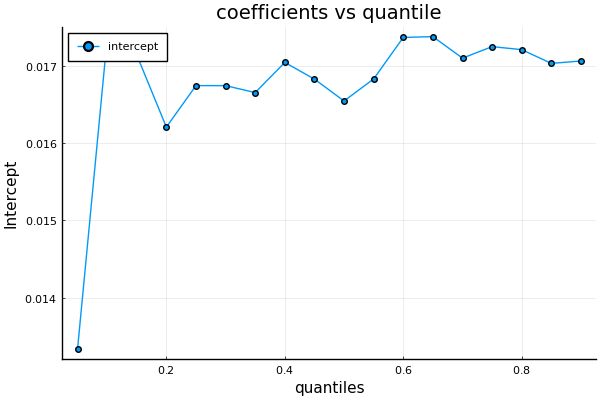

In [240]:
plot(a,w_quantile[:,13],markershape=:circle,legend=:topleft,label="intercept")
xlabel!("quantiles")
ylabel!("Intercept")
title!("coefficients vs quantile")

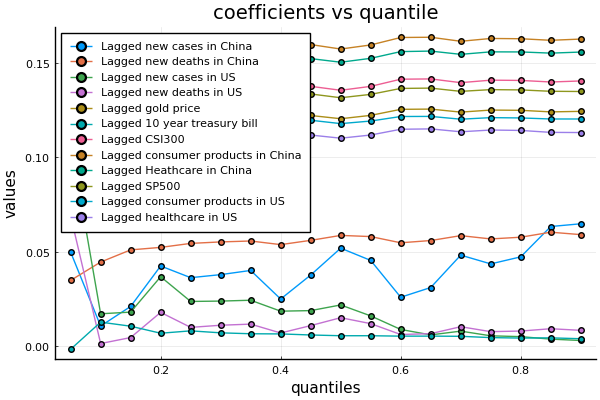

In [241]:
plot(a,w_quantile[:,1],markershape=:circle,legend=:topleft,label="Lagged new cases in China")
plot!(a,w_quantile[:,2],markershape=:circle,legend=:topleft,label="Lagged new deaths in China")
plot!(a,w_quantile[:,3],markershape=:circle,legend=:topleft,label="Lagged new cases in US")
plot!(a,w_quantile[:,4],markershape=:circle,legend=:topleft,label="Lagged new deaths in US")
plot!(a,w_quantile[:,5],markershape=:circle,legend=:topleft,label="Lagged gold price")
plot!(a,w_quantile[:,6],markershape=:circle,legend=:topleft,label="Lagged 10 year treasury bill")
plot!(a,w_quantile[:,7],markershape=:circle,legend=:topleft,label="Lagged CSI300")
plot!(a,w_quantile[:,8],markershape=:circle,legend=:topleft,label="Lagged consumer products in China")
plot!(a,w_quantile[:,9],markershape=:circle,legend=:topleft,label="Lagged Heathcare in China")
plot!(a,w_quantile[:,10],markershape=:circle,legend=:topleft,label="Lagged SP500")
plot!(a,w_quantile[:,11],markershape=:circle,legend=:topleft,label="Lagged consumer products in US")
plot!(a,w_quantile[:,12],markershape=:circle,legend=:topleft,label="Lagged healthcare in US")
xlabel!("quantiles")
ylabel!("values")
title!("coefficients vs quantile")

### cproducts_ch

In [25]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,2],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    test_pred=X_test*w
    println("quantile=", i)
    MSE(y[:,2], pred)
    MAE(y[:,2], pred)
    R2(y[:,2], pred)
    MSE(y_test[:,2], test_pred)
    MAE(y_test[:,2], test_pred)
    R2(y_test[:,2], test_pred)
end

quantile=0.05
MSE: 0.17393242190545796
MAE: 0.28109828852379704
R^2: -4.9302700645718245
MSE: 0.0029903571549112777
MAE: 0.04448523369244252
R^2: -9.019209562047854
quantile=0.1
MSE: 0.020126372724195686
MAE: 0.10293353713386243
R^2: 0.3137862143977469
MSE: 0.0013248090426103754
MAE: 0.028790883135207772
R^2: -3.4387806338815583
quantile=0.15
MSE: 0.012818085991450599
MAE: 0.08076073771537712
R^2: 0.5629641052113608
MSE: 0.0011267891985504788
MAE: 0.026338650983655322
R^2: -2.775313960069144
quantile=0.2
MSE: 0.009176560168951327
MAE: 0.06656579216429029
R^2: 0.6871228522577908
MSE: 0.0010869316742854577
MAE: 0.025821175918002096
R^2: -2.641771086242254
quantile=0.25
MSE: 0.008735886591523984
MAE: 0.06354510555948666
R^2: 0.7021477297121256
MSE: 0.0008982167843906462
MAE: 0.023536536513031493
R^2: -2.0094807171037217
quantile=0.3
MSE: 0.007250316860915827
MAE: 0.055762396047035506
R^2: 0.7527986066777106
MSE: 0.000579980907225045
MAE: 0.01896495889278396
R^2: -0.9432295041850167
quanti

In [243]:
w_quantile

18×13 Array{Float64,2}:
 0.0488319  0.0396187  0.106203   …  0.12425   0.112923  0.0168029
 0.0314098  0.0521203  0.054231      0.139209  0.126574  0.018972
 0.033687   0.0563233  0.0466832     0.140336  0.127602  0.0191271
 0.0324349  0.0577897  0.040878      0.141756  0.128481  0.0191946
 0.0310099  0.0586194  0.039882      0.142027  0.12837   0.019125
 0.0262217  0.0583562  0.038991   …  0.142638  0.128824  0.0191917
 0.0365311  0.0596425  0.0430408     0.140788  0.127474  0.0189863
 0.0233978  0.0572526  0.0375687     0.143373  0.129221  0.0192416
 0.027334   0.0571174  0.0377721     0.14295   0.129148  0.0192564
 0.032503   0.0583575  0.0363363     0.142606  0.129182  0.0192957
 0.0415022  0.0597779  0.0355641  …  0.141949  0.129019  0.0192858
 0.0395479  0.058719   0.0349244     0.142468  0.12937   0.0193207
 0.0412776  0.0591708  0.0320304     0.142985  0.129929  0.019414
 0.0574139  0.0621997  0.033637      0.140726  0.128945  0.0192858
 0.0604608  0.063102   0.0301762     0.14

### healthcare_ch

In [26]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,3],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    test_pred=X_test*w
    println("quantile=", i)
    MSE(y[:,3], pred)
    MAE(y[:,3], pred)
    R2(y[:,3], pred)
    MSE(y_test[:,3], test_pred)
    MAE(y_test[:,3], test_pred)
    R2(y_test[:,3], test_pred)
end

quantile=0.05
MSE: 0.24183246177052223
MAE: 0.30835391134046486
R^2: -10.120349336151993
MSE: 0.036491128674799214
MAE: 0.17427993645301126
R^2: -76.71459804579986
quantile=0.1
MSE: 0.07210511879677428
MAE: 0.171791079386396
R^2: -2.3156595441092587
MSE: 0.02611403960366222
MAE: 0.15054421226583106
R^2: -54.61467032814037
quantile=0.15
MSE: 0.019987899069817638
MAE: 0.09361721414449534
R^2: 0.08088261383603412
MSE: 0.019630650073247373
MAE: 0.13132016028402105
R^2: -40.80709490835078
quantile=0.2
MSE: 0.013951642078664462
MAE: 0.07836001303875872
R^2: 0.358451993616442
MSE: 0.018783711950188936
MAE: 0.1284215370730537
R^2: -39.00338375461479
quantile=0.25
MSE: 0.007061701608330805
MAE: 0.05358697173200373
R^2: 0.6752768912106528
MSE: 0.016846149461470734
MAE: 0.1232296722241147
R^2: -34.876986587202886
quantile=0.3
MSE: 0.006793207343643585
MAE: 0.0520178804421359
R^2: 0.6876232486691001
MSE: 0.017767472454166974
MAE: 0.126839305168615
R^2: -36.83911405894614
quantile=0.350000000000000

In [245]:
w_quantile

18×13 Array{Float64,2}:
 0.0561596  0.0390458  0.120373   …  0.113151  0.103052  0.0153069
 0.0510041  0.0465434  0.0788512     0.12399   0.113698  0.0169041
 0.0484673  0.0549141  0.0516968     0.130241  0.120048  0.0178812
 0.0490236  0.0579897  0.0449992     0.131339  0.121216  0.0180517
 0.0405147  0.0570298  0.0366653     0.134468  0.123715  0.0183856
 0.0409506  0.0574873  0.0365251  …  0.134308  0.123784  0.0184297
 0.0417048  0.0578981  0.035046      0.134178  0.124139  0.0184981
 0.0335671  0.0567433  0.0306434     0.135476  0.12587   0.0187679
 0.0267381  0.0540332  0.0273945     0.13668   0.127429  0.019013
 0.0351278  0.0565728  0.0283339     0.135365  0.126669  0.0189495
 0.0297968  0.0549062  0.0245789  …  0.136459  0.128054  0.0191816
 0.0297955  0.0548651  0.0223339     0.136561  0.128322  0.0192379
 0.054761   0.061671   0.0251704     0.133953  0.125537  0.0188222
 0.0471474  0.0596121  0.0227266     0.134879  0.126545  0.018983
 0.050154   0.0597421  0.0212431     0.1

### SP500

In [27]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,4],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    test_pred=X_test*w
    println("quantile=", i)
    MSE(y[:,4], pred)
    MAE(y[:,4], pred)
    R2(y[:,4], pred)
    MSE(y_test[:,4], test_pred)
    MAE(y_test[:,4], test_pred)
    R2(y_test[:,4], test_pred)
end

quantile=0.05
MSE: 0.18782441882046766
MAE: 0.2830131452392073
R^2: -18.171481880322546
MSE: 0.0018665955281637195
MAE: 0.03633918109927878
R^2: -6.890586130927682
quantile=0.1
MSE: 0.10941722844146223
MAE: 0.21492987470217081
R^2: -10.16835832973181
MSE: 0.0012570848586808102
MAE: 0.029833021193522605
R^2: -4.314025562390598
quantile=0.15
MSE: 0.0059843848127638264
MAE: 0.061188274849909616
R^2: 0.3891660854148917
MSE: 0.005492322338435465
MAE: 0.0730330569786717
R^2: -22.217478996575643
quantile=0.2
MSE: 0.006625212743827444
MAE: 0.06348362355519227
R^2: 0.32375594787290385
MSE: 0.004582954469945894
MAE: 0.06601973506302558
R^2: -18.373343841021086
quantile=0.25
MSE: 0.004860412552246749
MAE: 0.053832094079403134
R^2: 0.5038913908986544
MSE: 0.004522700305257914
MAE: 0.0656307111245673
R^2: -18.118633771783255
quantile=0.3
MSE: 0.003526997127070299
MAE: 0.04437420726662621
R^2: 0.6399948316719644
MSE: 0.0034824975352677587
MAE: 0.05735612510383263
R^2: -13.721425364072461
quantile=0.

In [247]:
w_quantile

18×13 Array{Float64,2}:
 0.0348239  0.0323605   0.0831344    …  0.100239  0.0920419  0.0137964
 0.0328549  0.038499    0.0642046       0.104689  0.0966567  0.0145168
 0.0197454  0.0494216   0.00376476      0.118917  0.110643   0.0166512
 0.0266321  0.0527149   0.00510286      0.117939  0.109501   0.0164349
 0.0259272  0.0533612   0.000604511     0.11922   0.110432   0.0164909
 0.0219429  0.0515082  -0.00261573   …  0.120412  0.111514   0.0165703
 0.0266391  0.0521219  -6.51716e-5      0.119693  0.111134   0.0165154
 0.0332871  0.0532355   0.0025978       0.118226  0.110275   0.0164065
 0.0243896  0.0510809  -0.00127926      0.119543  0.111797   0.0166418
 0.0301873  0.0519455   0.000780526     0.118285  0.111084   0.0165658
 0.0381675  0.0538651   0.00329091   …  0.11686   0.110103   0.016451
 0.0264648  0.051489   -0.00288358      0.118358  0.112138   0.0167722
 0.0297661  0.0521174  -0.00191418      0.117735  0.111662   0.0167259
 0.047916   0.0561357   0.00405455      0.115392  0.10

### DJI_Retail

In [28]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,5],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    test_pred=X_test*w
    println("quantile=", i)
    MSE(y[:,5], pred)
    MAE(y[:,5], pred)
    R2(y[:,5], pred)
    MSE(y_test[:,5], test_pred)
    MAE(y_test[:,5], test_pred)
    R2(y_test[:,5], test_pred)
end

quantile=0.05
MSE: 0.16773569466163016
MAE: 0.2870614108702433
R^2: -6.842857126879373
MSE: 0.0032288637630554966
MAE: 0.047187834846606776
R^2: -22.47097158906497
quantile=0.1
MSE: 0.023124431336565904
MAE: 0.11511753357126744
R^2: -0.08123444731829887
MSE: 0.0013480185111826057
MAE: 0.031754915150294764
R^2: -8.798897228032967
quantile=0.15
MSE: 0.005545332672238887
MAE: 0.0639652868280975
R^2: 0.7407155825889068
MSE: 0.0021724655766377655
MAE: 0.04311897003668379
R^2: -14.791895096631318
quantile=0.2
MSE: 0.005643657383898004
MAE: 0.0627775751697679
R^2: 0.7361181910370389
MSE: 0.001259919207716559
MAE: 0.030561610925742885
R^2: -8.158493544134194
quantile=0.25
MSE: 0.004337730445447275
MAE: 0.053896791597405
R^2: 0.7971797224962399
MSE: 0.0010973290051243998
MAE: 0.028453274877903428
R^2: -6.976607188517368
quantile=0.3
MSE: 0.0036955267739279653
MAE: 0.047329509984340296
R^2: 0.8272073898466138
MSE: 0.0007479880984584212
MAE: 0.02398510928154757
R^2: -4.437209091554536
quantile=0.

In [249]:
w_quantile

18×13 Array{Float64,2}:
 0.0438392  0.0292877  0.0938226  …  0.088404  0.0798985  0.0117974
 0.0184576  0.0322532  0.0438008     0.105456  0.0929821  0.0134258
 0.0139066  0.0368194  0.022751      0.110756  0.0974509  0.0140263
 0.022785   0.0417967  0.0252514     0.108269  0.0967278  0.0141251
 0.0206364  0.0404896  0.0214425     0.109581  0.0975098  0.0142298
 0.0194267  0.0405912  0.0189003  …  0.110082  0.0979792  0.0143425
 0.0231453  0.0416255  0.0206478     0.109082  0.0976133  0.0143571
 0.0229624  0.0407828  0.0213735     0.108988  0.0975955  0.0143854
 0.0320719  0.0432207  0.0255394     0.106907  0.0965097  0.014278
 0.0445166  0.0461242  0.0307784     0.104374  0.094915   0.0140886
 0.0246267  0.0402788  0.0251474  …  0.108334  0.0971728  0.0143841
 0.0327937  0.0425832  0.0268812     0.10662   0.0965587  0.0143325
 0.0343876  0.0430285  0.0259207     0.106463  0.096652   0.0143694
 0.0487958  0.0465751  0.0277072     0.104245  0.0955597  0.0142426
 0.052266   0.0467579  0.

### DJI_Pharma

In [29]:
w_quantile= Array{Float64}(undef, 18, 13)
a = LinRange(0.05,0.90,18)
row=0
for i in a
    w = proxgrad(QuantileLoss(quantile=i), ZeroReg(),Xoffset,y[:,6],maxiters=1000)
    row=row+1
    w_quantile[row,:] = w
    pred=Xoffset*w
    test_pred=X_test*w
    println("quantile=", i)
    MSE(y[:,6], pred)
    MAE(y[:,6], pred)
    R2(y[:,6], pred)
    MSE(y_test[:,6], test_pred)
    MAE(y_test[:,6], test_pred)
    R2(y_test[:,6], test_pred)
end

quantile=0.05
MSE: 0.1582210808167769
MAE: 0.273409960452861
R^2: -41.75106678946105
MSE: 0.003310782339134837
MAE: 0.04873109981629687
R^2: -8.654321313542773
quantile=0.1
MSE: 0.10194139547011287
MAE: 0.21971142608645736
R^2: -26.54439158079337
MSE: 0.0036063470145853136
MAE: 0.05248220497621198
R^2: -9.516195050152577
quantile=0.15
MSE: 0.01697039146833544
MAE: 0.10330915123076606
R^2: -3.5853708959696347
MSE: 0.0003943628549985916
MAE: 0.01588721207430499
R^2: -0.1499716158560258
quantile=0.2
MSE: 0.008224620670115406
MAE: 0.06949777140769633
R^2: -1.222278509102452
MSE: 0.00018118828340808136
MAE: 0.010899565032759191
R^2: 0.471650586752865
quantile=0.25
MSE: 0.006990221713865843
MAE: 0.06378024752249148
R^2: -0.8887460117193953
MSE: 0.00023122313853583655
MAE: 0.01185670027054032
R^2: 0.32574773999364803
quantile=0.3
MSE: 0.007538975369107322
MAE: 0.06603469394723961
R^2: -1.0370183155431585
MSE: 0.0010478695245223484
MAE: 0.028267321467052072
R^2: -2.0556128576702637
quantile=0.

In [251]:
w_quantile

18×13 Array{Float64,2}:
 0.0376621   0.0269432   0.0767484   …  0.0813069  0.074919   0.0111597
 0.0382512   0.0319594   0.062493       0.0841545  0.0783812  0.0117161
 0.0349242   0.0414607   0.0175351      0.0930836  0.0891355  0.0134586
 0.0300195   0.0425068   0.00265259     0.0958532  0.0932593  0.014131
 0.0290843   0.043233    0.00155119     0.0957356  0.0935342  0.0141788
 0.0379545   0.0461092   0.00512593  …  0.0943669  0.0918326  0.0139164
 0.0332245   0.0452527   0.00233225     0.0949928  0.0928414  0.014064
 0.0265347   0.0438036  -0.00116315     0.0956252  0.0942632  0.0142973
 0.0223266   0.0426714  -0.00374974     0.0960227  0.0953662  0.014467
 0.0196701   0.0418435  -0.00559677     0.096692   0.0958561  0.0144777
 0.0144234   0.0408697  -0.00787104  …  0.0971784  0.0967718  0.0146263
 0.00820173  0.0401306  -0.0118471      0.0979039  0.0978905  0.0147928
 0.0124032   0.0420482  -0.00991091     0.0976799  0.0967375  0.0146012
 0.0049463   0.0401941  -0.013699       0.0